# Energy Minimization for 2D Problems
After familiarizing yourself with the formulation, it is time to apply the knowledge to a practical example. This tutorial will go over varying penalization weights for a geometry in 2D.

## Setup the genie object and initialize the B-spline

In [1]:
from lsdo_genie import Genie2D
from lsdo_genie.utils.geometric_shapes import Multi_circle
import numpy as np

num_surface_pts = 25
centers = [[-13.,-0.5],[-7.,2.],[2.,0.],[10.,-4.]]
radii = [2.,2.,4.,3.]
geom_shape = Multi_circle(centers,radii)
surface_points = geom_shape.surface_points(num_surface_pts)
surface_normals = geom_shape.unit_normals(num_surface_pts)
custom_domain = np.array([
    [-18.,18.],
    [-8.,8.]
])
genie = Genie2D(verbose=False)
genie.input_point_cloud(
    surface_points=surface_points,
    surface_normals=surface_normals,
)
genie.config(
    domain=custom_domain,
    max_control_points=30,
    min_ratio=0.75,
)
print("Initial B-spline error:")
genie.compute_errors()

Initial B-spline error:
Relative surface error: 
   Max: 4.873e-03
   RMS: 2.563e-03
Gradient error: 
   Max: 2.146e-01 
   RMS: 7.325e-02


## Optimize with specific the penalization weights
After optimization, the error terms of the function will decrease, sometimes by multiple orders of magnitude.

In [2]:
genie.solve_energy_minimization(
    Ln=1e0,
    Lr=1e-4,
)
print(f"Time to solve: {genie.timetosolve:1.3f} seconds")
print("Optimized B-spline error:")
genie.compute_errors()

Time to solve:  0.013741899999999418
Optimized B-spline error:
Relative surface error: 
   Max: 5.594e-05
   RMS: 1.831e-05
Gradient error: 
   Max: 5.789e-03 
   RMS: 1.732e-03


## Varying the penalization weights
The choice of penalization weights is purely empirical. 
It is recommended to try different weights to find the best for your geometric shape.
You may check this by visualizing the B-spline and printing the error terms.
* It is always recommended that $\lambda_n>\lambda_r$.

Ln=1e+02, Lr=1e-02


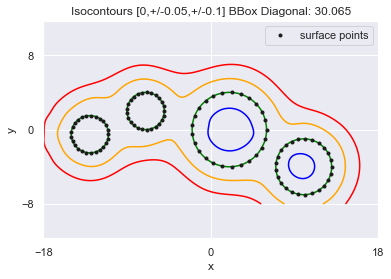

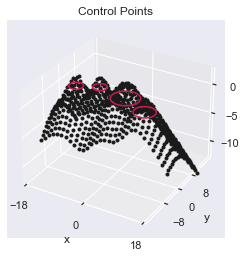

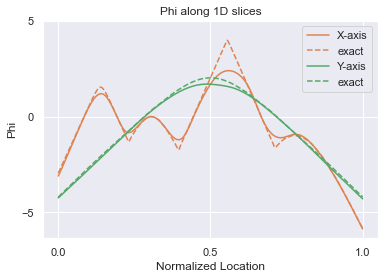

Relative surface error: 
   Max: 4.136e-04
   RMS: 8.656e-05
Gradient error: 
   Max: 5.513e-03 
   RMS: 1.592e-03
--------------------------
Ln=1e+02, Lr=1e-06


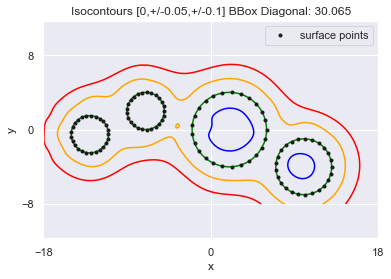

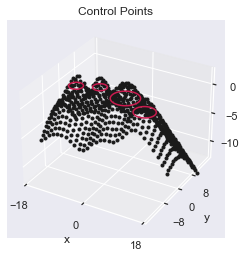

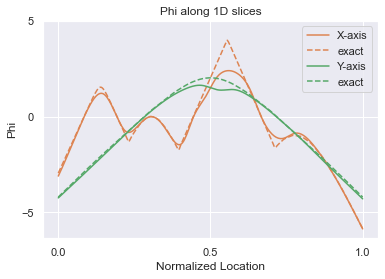

Relative surface error: 
   Max: 4.272e-04
   RMS: 7.890e-05
Gradient error: 
   Max: 3.303e-03 
   RMS: 1.067e-03
--------------------------
Ln=1e-02, Lr=1e-02


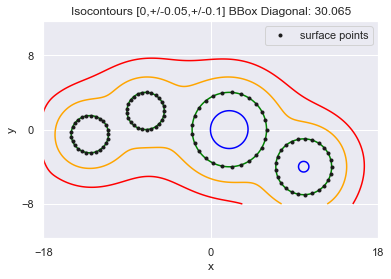

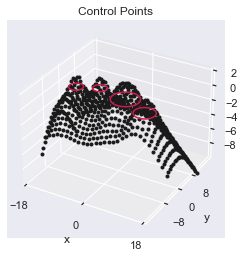

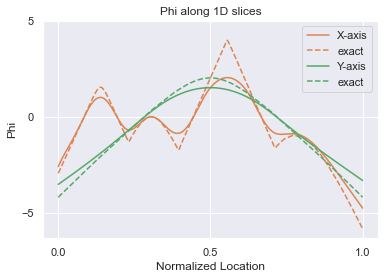

Relative surface error: 
   Max: 1.015e-04
   RMS: 3.915e-05
Gradient error: 
   Max: 2.770e-01 
   RMS: 1.242e-01
--------------------------
Ln=1e-02, Lr=1e-06


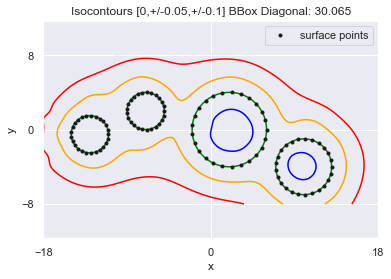

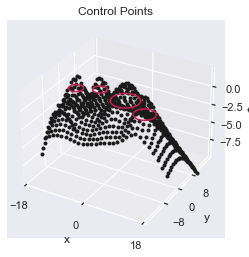

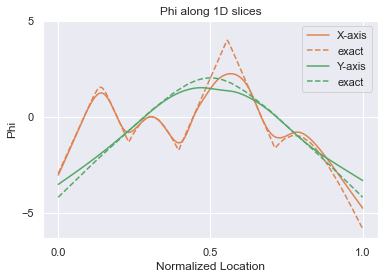

Relative surface error: 
   Max: 2.487e-05
   RMS: 6.491e-06
Gradient error: 
   Max: 4.671e-03 
   RMS: 1.970e-03
--------------------------


In [3]:
for Ln in [1e2, 1e-2]:
    for Lr in [1e-2, 1e-6]:
        genie.solve_energy_minimization(
            Ln=Ln,
            Lr=Lr,
        )
        print(f"Ln={Ln:1.0e}, Lr={Lr:1.0e}")
        genie.visualize()
        genie.compute_errors()
        print("--------------------------")